<a href="https://www.kaggle.com/code/parisrohan/rp-space-titanic-1?scriptVersionId=91625550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## Load data and required libraries

In [2]:
#Load the required librares
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [3]:
#Load training dataset
df_train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#Load test dataset
df_test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
#Check submission file
df_submission=pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
df_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


## EDA

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
df_train.shape, df_test.shape

((8693, 14), (4277, 13))

**Feature Description**:

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Text(0.5, 1.0, 'Distribution of target feature')

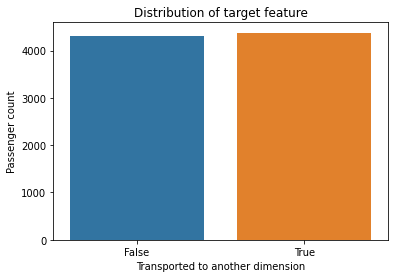

In [9]:
#distribution of values in target feature
sns.barplot(x=df_train['Transported'].value_counts().index, y=df_train['Transported'].value_counts().values, data=df_train)
plt.xlabel('Transported to another dimension')
plt.ylabel('Passenger count')
plt.title('Distribution of target feature')

Observation: The training dataset is a **Balanced dataset**.

Text(0.5, 1.0, 'Distribution of target feature - homeplanet')

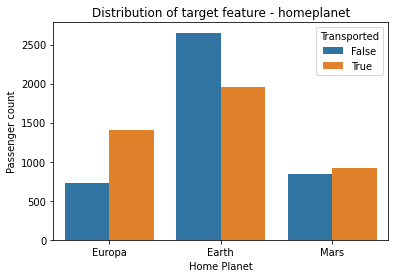

In [10]:
#distribution of values in target feature for each planet
sns.countplot(x='HomePlanet', data=df_train, hue='Transported')
plt.xlabel('Home Planet')
plt.ylabel('Passenger count')
plt.title('Distribution of target feature - homeplanet')

Text(0.5, 1.0, 'Distribution of target feature - ticket class')

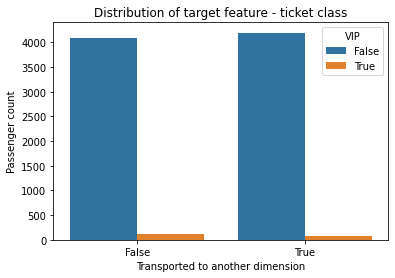

In [11]:
#distribution of values in target feature based on ticket class
sns.countplot(x='Transported', data=df_train, hue='VIP')
plt.xlabel('Transported to another dimension')
plt.ylabel('Passenger count')
plt.title('Distribution of target feature - ticket class')

## Data preprocessing

In [12]:
#combine train and test data for data preprocessing
df_merge=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])
df_merge.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,ind,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,test,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,test,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,test,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,test,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,test,NaN


In [13]:
df_merge.shape

(12970, 15)

In [14]:
df_merge['Transported']=df_merge['Transported'].astype('object')

### Handle missing values

In [15]:
#Functon to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [16]:
#Get count of missing values - ignore 4277 records from 'Transported' as it is target feature
print(get_cols_with_missing_values(df_merge))

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64


In [17]:
#Drop 'Name' feature
df_merge.drop(["Name"], axis=1, inplace=True)

In [18]:
#We will impute a '0' value for the luxury amenities as a NULL value might indicate that the passenger has not used them
bill_luxury_amenity=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_merge[bill_luxury_amenity]=df_merge[bill_luxury_amenity].fillna(0)

In [19]:
#Get categorical and numerical columns
categorical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes=='object' and cname!='Transported']
numerical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes!='object']

In [20]:
#Handling Missing Values in Categorical features by replacing them with the feature mode value
for col in categorical_cols:
    df_merge[col] = df_merge[col].fillna(df_merge[col].mode()[0])

In [21]:
#Handling Missing Values in numerical features by replacing them with the feature mean value
for col in numerical_cols:
    df_merge[col] = df_merge[col].fillna(df_merge[col].mean())

In [22]:
#Make sure all the missing values have been handled- ignore 4277 records from 'Transported' as it is target feature
print(get_cols_with_missing_values(df_merge))

Transported    4277
dtype: int64


### Feature Engineering

In [23]:
new_df = df_merge['PassengerId'].str.split('_',expand = True)
df_merge['Passenger_Group'] = new_df[0]
df_merge['Passenger_Number_in_Group'] = new_df[1]
df_merge.drop(["PassengerId"], axis=1, inplace=True)

In [24]:
#We will split 'Cabin' on the 2nd occurence of '/' to get the cabin side
#df_merge['Cabin'].apply(lambda x: "/".join(x.split('/',0)[:1]))
